In [92]:
import numpy as np
import pandas as pd
import streamlit as st
from sklearn.ensemble import RandomForestClassifier
import pickle 

In [93]:
df = pd.read_csv(r"C:\Users\Praveen\Desktop\ML\Data\penguins.csv")

In [94]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Unnamed: 7
0,Adelie,Torgersen,39.1,18.7,181,3750,male,NaN
1,Adelie,Torgersen,39.5,17.4,186,3800,female,NaN
2,Adelie,Torgersen,40.3,18.0,195,3250,female,NaN
3,Adelie,Torgersen,36.7,19.3,193,3450,female,NaN
4,Adelie,Torgersen,39.3,20.6,190,3650,male,NaN
...,...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male,NaN
329,Chinstrap,Dream,43.5,18.1,202,3400,female,NaN
330,Chinstrap,Dream,49.6,18.2,193,3775,male,NaN
331,Chinstrap,Dream,50.8,19.0,210,4100,male,NaN


In [95]:
df.drop(['Unnamed: 7'],axis=1,inplace=True)

In [96]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male
329,Chinstrap,Dream,43.5,18.1,202,3400,female
330,Chinstrap,Dream,49.6,18.2,193,3775,male
331,Chinstrap,Dream,50.8,19.0,210,4100,male


In [97]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [98]:
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

(array([ 2.,  6., 20., 19., 28., 27., 29., 18., 17., 30., 33., 20., 27.,
        34., 13.,  3.,  3.,  2.,  1.,  1.]),
 array([32.1  , 33.475, 34.85 , 36.225, 37.6  , 38.975, 40.35 , 41.725,
        43.1  , 44.475, 45.85 , 47.225, 48.6  , 49.975, 51.35 , 52.725,
        54.1  , 55.475, 56.85 , 58.225, 59.6  ]),
 <a list of 20 Patch objects>)

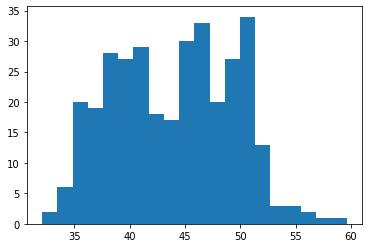

In [99]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.hist(x='bill_length_mm',data=df,bins=20)

(array([ 6., 14., 14., 19., 17., 15., 18., 15., 16., 27., 21., 32., 24.,
        31., 20., 19., 10.,  5.,  4.,  6.]),
 array([13.1 , 13.52, 13.94, 14.36, 14.78, 15.2 , 15.62, 16.04, 16.46,
        16.88, 17.3 , 17.72, 18.14, 18.56, 18.98, 19.4 , 19.82, 20.24,
        20.66, 21.08, 21.5 ]),
 <a list of 20 Patch objects>)

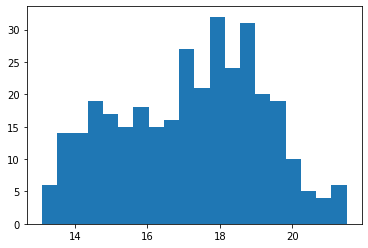

In [100]:
plt.hist(x='bill_depth_mm',data=df,bins=20)

(array([ 2.,  1.,  8., 12., 22., 29., 41., 36., 28., 16.,  9.,  6., 27.,
        15., 23., 15., 19.,  9.,  5., 10.]),
 array([172.  , 174.95, 177.9 , 180.85, 183.8 , 186.75, 189.7 , 192.65,
        195.6 , 198.55, 201.5 , 204.45, 207.4 , 210.35, 213.3 , 216.25,
        219.2 , 222.15, 225.1 , 228.05, 231.  ]),
 <a list of 20 Patch objects>)

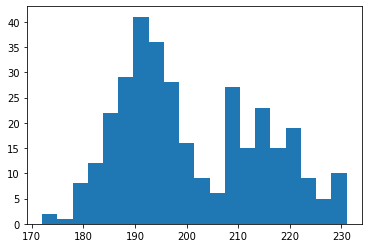

In [101]:
plt.hist(x='flipper_length_mm',data=df,bins=20)

(array([ 3., 11., 13., 29., 31., 38., 35., 17., 24., 17., 18., 21., 15.,
        12., 10., 17., 11.,  5.,  5.,  1.]),
 array([2700., 2880., 3060., 3240., 3420., 3600., 3780., 3960., 4140.,
        4320., 4500., 4680., 4860., 5040., 5220., 5400., 5580., 5760.,
        5940., 6120., 6300.]),
 <a list of 20 Patch objects>)

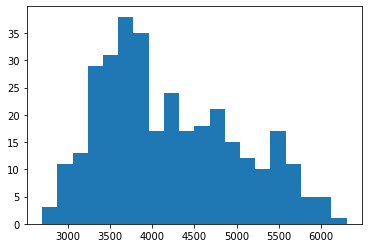

In [102]:
plt.hist(x='body_mass_g',data=df,bins=20)

In [103]:
encode=['sex','island']
for col in encode:
    dumm = pd.get_dummies(df[col],prefix=col)
    df = pd.concat([df,dumm],axis=1)
    del df[col]

In [104]:
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_female,sex_male,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181,3750,0,1,0,0,1
1,Adelie,39.5,17.4,186,3800,1,0,0,0,1
2,Adelie,40.3,18.0,195,3250,1,0,0,0,1
3,Adelie,36.7,19.3,193,3450,1,0,0,0,1
4,Adelie,39.3,20.6,190,3650,0,1,0,0,1


In [105]:
target_map = {'Adelie' : 0, 'Chinstrap' : 1, 'Gentoo' : 2}
def target_encode(val):
    return target_map[val]

In [106]:
df['species'] = df['species'].apply(target_encode)

In [107]:
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_female,sex_male,island_Biscoe,island_Dream,island_Torgersen
0,0,39.1,18.7,181,3750,0,1,0,0,1
1,0,39.5,17.4,186,3800,1,0,0,0,1
2,0,40.3,18.0,195,3250,1,0,0,0,1
3,0,36.7,19.3,193,3450,1,0,0,0,1
4,0,39.3,20.6,190,3650,0,1,0,0,1


In [108]:
X=df.drop('species',axis=1)
Y=df['species']

In [109]:
rfc = RandomForestClassifier()
rfc.fit(X,Y)

C:\Users\Praveen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [110]:
pickle.dump(rfc, open('penguins_rfc.pkl','wb'))

In [111]:
load_clf = pickle.load(open('penguins_rfc.pkl','rb'))